# District migration in Slovakia
The aim of this notebook is to generate graphs for inter-district migration is Slovak districts

In [2]:
import os
import pandas as pd
import geopandas
import seaborn as sns
import matplotlib.pyplot as plt

### Net migration map
- Creates a map of districts and their population change

In [7]:
net_migration_raw = pd.read_csv("../../Data/slovakia/net_migration_districts_sk.csv")

districts_geodata = geopandas.read_file("../../Data/geography/slovak_districts.json")

# display(net_migration_raw.head())
# display(districts_geodata.head())

districts_net_migration = pd.merge(districts_geodata,net_migration_raw,on="LAU1_CODE")

display(districts_net_migration.head())

,LAU1,DOW,IDN3,NM3,IDN2,NM2,NUTS2,NUTS2_CODE,NUTS3,NUTS3_CODE,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1993
0,Banská Bystrica,2021-02-26 00:00:00+00:00,601,Banská Bystrica,6,Banskobystrický,Stredné Slovensko,SK03,Banskobystrický kraj,SK032,...,-109,-14,67,4,11,-166,-19,149,242,6
1,Banská Štiavnica,2021-02-26 00:00:00+00:00,602,Banská Štiavnica,6,Banskobystrický,Stredné Slovensko,SK03,Banskobystrický kraj,SK032,...,10,39,26,15,46,97,100,-18,22,-7
2,Bardejov,2021-02-26 00:00:00+00:00,701,Bardejov,7,Prešovský,Východné Slovensko,SK04,Prešovský kraj,SK041,...,-93,-85,-79,-96,-63,-79,-52,-12,-47,75
3,Bratislava I,2021-02-26 00:00:00+00:00,101,Bratislava I,1,Bratislavský,Bratislavský kraj,SK01,Bratislavský kraj,SK010,...,-329,-238,-169,-43,-157,-240,-169,126,271,-3
4,Bratislava II,2021-02-26 00:00:00+00:00,102,Bratislava II,1,Bratislavský,Bratislavský kraj,SK01,Bratislavský kraj,SK010,...,340,219,218,157,-150,-35,55,226,128,293


#### Creating drawing function

2245


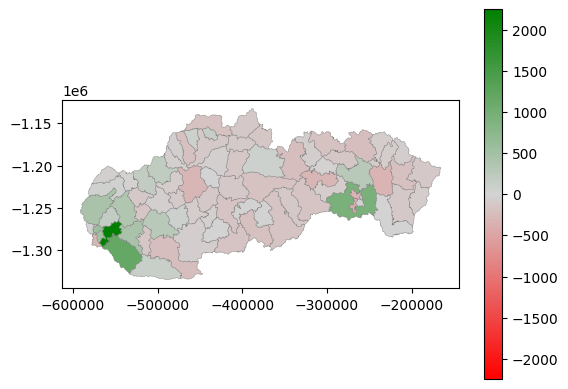

In [42]:
from matplotlib.colors import Normalize, TwoSlopeNorm, LinearSegmentedColormap
def draw_districts(table, target_column,color_scheme = "rgb",label=""):
    max_value = max([abs(x) for x in table.loc[:,target_column]])
    print(max_value)

    cmap = LinearSegmentedColormap.from_list("red_green",["red","lightgray","green"])
    norm = Normalize(vmin=-max_value, vmax=max_value)

    axes = table.plot(column = target_column,legend=True,cmap=cmap,norm=norm,edgecolor="gray",linewidth=0.3)

    
draw_districts(districts_net_migration,"2023")
# draw_districts(districts_net_migration,"2010")